In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
data1 = session.query(Measurement).all()

for data in data1:
    print(data.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-03
2015-07-04
2015-07-05
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-18
2015-07-19
2015-07-20
2015-07-21
2015-07-22
2015-07-23
2015-07-24
2015-07-25
2015-07-26
2015-07-27
2015-07-28
2015-07-29
2015-07-30
2015-07-31
2015-08-01
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-07
2015-08-08
2015-08-09
2015-08-10

2010-06-22
2010-06-23
2010-06-24
2010-06-25
2010-06-26
2010-06-27
2010-06-28
2010-06-29
2010-06-30
2010-07-01
2010-07-02
2010-07-03
2010-07-04
2010-07-05
2010-07-06
2010-07-07
2010-07-08
2010-07-09
2010-07-10
2010-07-11
2010-07-12
2010-07-13
2010-07-14
2010-07-15
2010-07-16
2010-07-17
2010-07-18
2010-07-19
2010-07-20
2010-07-21
2010-07-22
2010-07-23
2010-07-24
2010-07-25
2010-07-26
2010-07-27
2010-07-28
2010-07-29
2010-07-30
2010-07-31
2010-08-01
2010-08-02
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-07
2010-08-08
2010-08-09
2010-08-10
2010-08-11
2010-08-12
2010-08-13
2010-08-14
2010-08-15
2010-08-16
2010-08-17
2010-08-18
2010-08-19
2010-08-20
2010-08-21
2010-08-22
2010-08-23
2010-08-24
2010-08-25
2010-08-26
2010-08-27
2010-08-28
2010-08-29
2010-08-30
2010-08-31
2010-09-01
2010-09-02
2010-09-03
2010-09-04
2010-09-05
2010-09-06
2010-09-07
2010-09-08
2010-09-09
2010-09-10
2010-09-11
2010-09-12
2010-09-13
2010-09-14
2010-09-15
2010-09-16
2010-09-17
2010-09-18
2010-09-19
2010-09-20

2015-02-16
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
2015-02-22
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-02-28
2015-03-01
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-08
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-15
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21
2015-03-22
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-28
2015-03-29
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-04
2015-04-05
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-18
2015-04-19
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01
2015-05-02
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18

2011-07-30
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-07
2011-08-13
2011-08-15
2011-08-16
2011-08-17
2011-08-18
2011-08-25
2011-08-26
2011-08-27
2011-08-29
2011-08-30
2011-08-31
2011-09-01
2011-09-02
2011-09-03
2011-09-04
2011-09-06
2011-09-07
2011-09-09
2011-09-10
2011-09-12
2011-09-13
2011-09-14
2011-09-15
2011-09-16
2011-09-17
2011-09-19
2011-09-20
2011-09-21
2011-09-22
2011-09-23
2011-09-26
2011-09-27
2011-09-28
2011-09-29
2011-09-30
2011-10-01
2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-21
2011-11-22
2011-11-23
2011-11-25
2011-11-27

2017-08-20
2017-08-21
2017-08-23
2010-05-03
2010-05-04
2010-05-05
2010-05-06
2010-05-07
2010-05-10
2010-05-11
2010-05-12
2010-05-13
2010-05-14
2010-05-17
2010-05-18
2010-05-19
2010-05-20
2010-05-21
2010-05-25
2010-05-26
2010-05-27
2010-05-28
2010-06-01
2010-06-02
2010-06-03
2010-06-04
2010-06-07
2010-06-08
2010-06-09
2010-06-10
2010-06-15
2010-06-16
2010-06-17
2010-06-18
2010-06-21
2010-06-22
2010-06-23
2010-06-24
2010-06-25
2010-06-28
2010-06-29
2010-06-30
2010-07-01
2010-07-02
2010-07-06
2010-07-07
2010-07-08
2010-07-09
2010-07-14
2010-07-15
2010-07-16
2010-07-19
2010-07-20
2010-07-21
2010-07-22
2010-07-23
2010-08-02
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-09
2010-08-10
2010-08-11
2010-08-12
2010-08-13
2010-08-16
2010-08-17
2010-08-18
2010-08-19
2010-08-23
2010-08-24
2010-08-25
2010-08-26
2010-08-27
2010-08-30
2010-08-31
2010-09-01
2010-09-02
2010-09-03
2010-09-07
2010-09-08
2010-09-09
2010-09-10
2010-09-13
2010-09-14
2010-09-15
2010-09-16
2010-09-17
2010-09-20
2010-09-21

2012-05-18
2012-05-22
2012-05-24
2012-05-25
2012-05-27
2012-05-28
2012-06-01
2012-06-14
2012-06-21
2012-06-26
2012-06-29
2012-07-02
2012-07-20
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-30
2012-07-31
2012-08-01
2012-08-03
2012-08-06
2012-08-24
2012-09-14
2012-09-17
2012-09-21
2012-09-24
2012-10-05
2012-10-08
2012-10-10
2012-10-11
2012-10-12
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-22
2012-11-01
2012-11-08
2012-11-13
2012-11-15
2012-11-16
2012-11-20
2012-11-26
2012-11-27
2012-12-03
2012-12-06
2013-01-10
2013-01-14
2013-01-23
2013-01-24
2013-01-25
2013-02-01
2013-02-02
2013-02-06
2013-02-07
2013-02-08
2013-02-14
2013-02-15
2013-02-20
2013-02-22
2013-02-25
2013-02-27
2013-04-03
2013-04-05
2013-04-08
2013-04-11
2013-04-15
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-12
2013-08-14
2013-08-19
2013-08-21
2013-08-22
2013-08-23
2013-08-27
2013-08-29
2013-08-30
2013-09-01
2013-09-05
2013-09-06
2013-09-10
2013-09-16
2013-09-19
2013-09-30
2013-10-18
2013-12-17

2015-04-16
2015-04-17
2015-04-18
2015-04-19
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-29
2015-04-30
2015-05-01
2015-05-02
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-18
2015-07-19
2015-07-20

2013-04-24
2013-04-25
2013-04-26
2013-04-27
2013-04-28
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-04
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-11
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-21
2013-07-22
2013-07-23

2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22

2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-05-01
2011-05-02
2011-05-03
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-08
2011-07-10
2011-07-11
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19

2017-03-05
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-11
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-18
2017-03-19
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24
2017-03-25
2017-03-26
2017-03-27
2017-03-28
2017-03-29
2017-03-31
2017-04-01
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06
2017-04-08
2017-04-09
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-14
2017-04-15
2017-04-16
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-04-29
2017-04-30
2017-05-01
2017-05-02
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-30
2017-06-01
2017-06-03
2017-06-04
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-10
2017-06-11
2017-06-12
2017-06-13

In [15]:

data2 = session.query(Measurement).filter(Measurement.date == '2017-08-23').all()

for data in data2:
    print(data.date, data.prcp, data.station)

2017-08-23 0.0 USC00519397
2017-08-23 0.0 USC00514830
2017-08-23 0.08 USC00519523
2017-08-23 0.45 USC00516128


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date_text = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_text 

('2017-08-23')

In [17]:
all_measurement = session.query(Measurement).all()
all_measurement_df = pd.DataFrame([x.__dict__ for x in all_measurement])
#all_measurement_df['date'] = all_measurement_df['date'].datetime.strptime('24052010', "%d%m%Y").date()


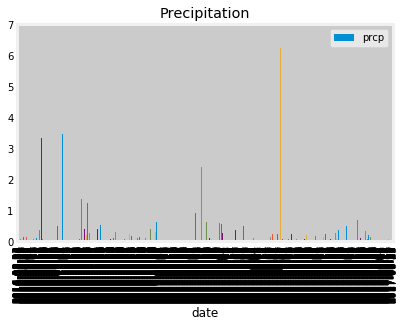

In [25]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_LTM = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').all()
weather_df = pd.DataFrame(precipitation_LTM)
weather_df = weather_df.set_index("date")
weather_df1 = weather_df.sort_values('date',ascending=True)
weather_df2 = weather_df1.dropna()
weather_df2.plot(y="prcp",kind="bar",title="Precipitation",grid=1)
plt.show()


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_df2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_query = session.query(Station.id,Station.station).all()
station_df = pd.DataFrame(station_query)
station_df

,id,station
0,1,USC00519397
1,2,USC00513117
2,3,USC00514830
3,4,USC00517948
4,5,USC00518838
5,6,USC00519523
6,7,USC00519281
7,8,USC00511918
8,9,USC00516128


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
